In [1]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import LineString
from scipy import optimize


In [2]:
w = np.arange(-2,3.05,0.05)
[x, y] = np.meshgrid(w, w) # Set up a 1D vector of values

#Set grid of x and y values with suitable separations

F = np.exp(-(x**2)-(y**2))+0.5*np.exp(-((x-1.5)**2)-(2*(y**2)))

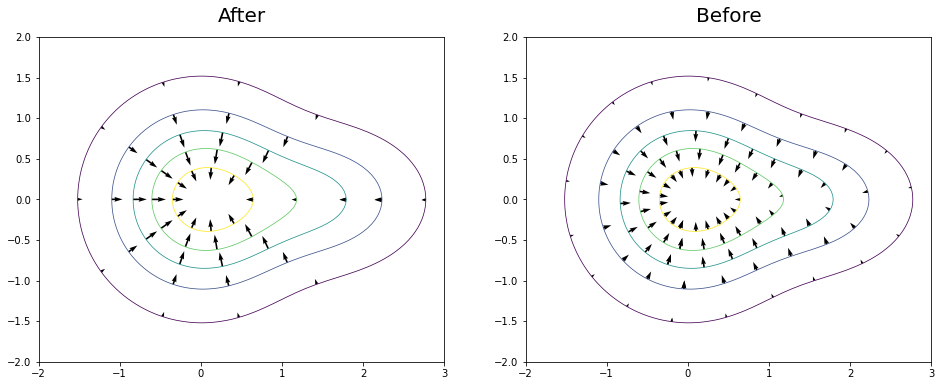

In [3]:
#Create figure and set the contourplot

fig = plt.figure(1, figsize=(16,12))

ax = fig.add_subplot(1,2,1)
ax.set_aspect('equal')

lvl = np.arange(0.1,1.05,0.2)
cont = ax.contour(x, y, F, levels=lvl, linewidths=0.75)

ax.set_ylim(-2,2)
ax.set_xlim(-2,3)
ax.set_aspect('equal')

ax.set_title("After", size=20, pad = 15)



#set up a polar meshgrid

th=np.arange(0,2*np.pi,0.314*2)
r=3

[R,Th]=np.meshgrid(r,th)

Xp=R*np.cos(Th)
Yp=R*np.sin(Th)


#extract coordinates

for i in range(np.size(cont.collections)):
    p = cont.collections[i].get_paths()[0]
    v1 = p.vertices

    ls1 = LineString(v1)
    
    for i in range(np.size(Xp)):
    
        ls2 = LineString([(0, 0), (Xp[i], Yp[i])])

        points = ls1.intersection(ls2)
    
        X, Y = points.x, points.y
        
        hi = (-2)*X*(np.exp(-(X**2)-(Y**2))) - 0.5*((2*X)-3)*(np.exp(-((X-1.5)**2)-(2*(Y**2))))
        hj = (-2)*Y*(np.exp(-(X**2)-(Y**2))) - (2*Y)*(np.exp(-((X-1.5)**2)-(2*(Y**2))))

        quiv = plt.quiver(X,Y,hi,hj,scale=25,width=0.004)


# Add the previous plot for comparison        
        

ax1 = fig.add_subplot(1,2,2)

grid = np.arange(-2,3.05,0.05)
[xg,yg] = np.meshgrid(grid,grid)
hg = np.exp(-(xg**2)-(yg**2))+0.5*np.exp(-((xg-1.5)**2)-(2*(yg**2)))

cont = ax1.contour(xg,yg,hg,levels=lvl, linewidths=0.75)

for i in range(np.size(cont.collections)):
    pp = cont.collections[i].get_paths()[0]
    v = pp.vertices
    
    
    xx = v[np.round(np.linspace(0, 0.5*np.size(v)-1, 20,)).astype(int),0]
    yy = v[np.round(np.linspace(0, 0.5*np.size(v)-1, 20)).astype(int),1]

    hii = (-2)*xx*(np.exp(-(xx**2)-(yy**2))) - 0.5*((2*xx)-3)*(np.exp(-((xx-1.5)**2)-(2*(yy**2))))
    hjj = (-2)*yy*(np.exp(-(xx**2)-(yy**2))) - (2*yy)*(np.exp(-((xx-1.5)**2)-(2*(yy**2))))


    ax1.quiver(xx,yy,hii,hjj,scale=32,width=0.004)

ax1.set_title("Before", size=20, pad = 15)
ax1.set_xlim(-2,3)
ax1.set_ylim(-2,2)
ax1.set_aspect('equal')